In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir('C:\\Users\\rober\\Desktop\\RAND_pro\\Data')
RandHIE = pd.read_csv("RandHIE.csv", sep=',')
RandHIE.head(3)

,plan,site,coins,tookphys,year,zper,black,income,xage,female,...,logc,fmde,hlthg,hlthf,hlthp,xghindx,linc,lnum,lnmeddol,binexp
0,3,1,100,0,1,125024,1.0,13748.759766,42.87748,0,...,0.0,0.0,1,0,0,65.207802,9.528776,1.386294,2.134299,1
1,3,1,100,0,2,125024,1.0,13748.759766,43.87748,0,...,0.0,0.0,1,0,0,65.207802,9.528776,1.386294,4.128351,1
2,3,1,100,0,3,125024,1.0,13748.759766,44.87748,0,...,0.0,0.0,1,0,0,65.207802,9.528776,1.386294,NaN,0


This data frame contains the following columns: <br/>

**plan** HIE plan number. <br/>
**site** Participant’s place of residence when the participant was initially enrolled. <br/>
**coins** Coinsurance rate. <br/>
**tookphys** Took baseline physical. <br/>
**year** Study year. <br/>
**zper** Person identifier. <br/>
**black** 1 if race of household head is black. <br/>
**income** Family income. <br/>
**xage** Age in years. <br/>
**female** 1 if person is female. <br/>
**educdec** Education of household head in years. <br/>
**time** Time eligible during the year. <br/>
**outpdol** Outpatient expenses: all covered outpatient medical services excluding dental care, outpatient psychotherapy, **outpatient** drugs or supplies. <br/>
**drugdol** Drug expenses: all covered outpatient and dental drugs. <br/>
**suppdol** Supply expenses: all covered outpatient supplies including dental. <br/>
**mentdol** Psychotherapy expenses: all covered outpatient psychotherapy services including injections excluding charges for visits in excess of 52 per year, prescription drugs, and inpatient care <br/>
**inpdol** Inpatient expenses: all covered inpatient expenses in a hospital, mental hospital, or nursing
home, excluding outpatient care and renal dialysis. <br/>
**meddol** Medical expenses: all covered inpatient and outpatient services, including drugs, supplies,
and inpatient costs of newborns excluding dental care and outpatient psychotherapy. <br/>
**totadm** Hospital admissions: annual number of covered hospitalizations. <br/>
**inpmis** Incomplete Hospital Records: missing inpatient records. <br/>
**mentvis** Psychotherapy visits: indicates the annual number of outpatient visits for psychotherapy. 
It includes billed visits only. The limit was 52 covered visits per person per year. The count
includes an initial visit to a psychiatrist or psychologist. <br/>
**mdvis** Face-to-Face visits to physicians: annual covered outpatient visits with physician providers
(excludes dental, psychotherapy, and radiology/anesthesiology/pathology-only visits). <br/>
**notmdvis** Face-to-Face visits to nonphysicians: annual covered outpatient visits with nonphysician
providers such as speech and physical therapists, chiropractors, podiatrists, acupuncturists,
Christian Science etc. (excludes dental, healers, psychotherapy, and radiology/anesthesiology/pathologyonly visits). <br/>
**num** Family size. <br/>
**mhi** Mental health index. <br/>
**disea** Number of chronic diseases. <br/>
**physlm** Physical limitations. <br/>
**ghindx** General health index. <br/>
**mdeoff** Maximum expenditure offer. <br/>
**pioff** Participation incentive payment. <br/>
**child** 1 if age is less than 18 years. <br/>
**fchild** female times child. <br/>
**lfam** log of num (family size). <br/>
**lpi** log of pioff (participation incentive payment). <br/>
**idp** 1 if individual deductible plan. <br/>
**logc** log(coins+1). <br/>
**fmde** 0 if idp=1, ln(max(1,mdeoff/(0.01 times coins))) otherwise. <br/>
**hlthg** 1 if self-rated health is good – baseline is excellent self-rated health. <br/>
**hlthf** 1 if self-rated health is fair – baseline is excellent self-rated health. <br/>
**hlthp** 1 if self-rated health is poor – baseline is excellent self-rated health. <br/>
**xghindx** ghindx (general healt index) with imputations of missing values. <br/>
**linc** log of income (family income). <br/>
**lnum** log of num (family size). <br/>
**lnmeddol** log of meddol (medical expenses). <br/>
**binexp** 1 if meddol > 0. <br/>

### Create variable cost and select appropiate columns

In [3]:
RandHIE['cost'] = RandHIE.outpdol + RandHIE.drugdol + RandHIE.suppdol + RandHIE.mentdol + RandHIE.inpdol

In [4]:
select_cols = ['zper', 'year', 'cost' ,'xage' ,'disea' ,'physlm' , 'mhi', 'xghindx',
               'logc', 'idp', 'lpi', 'fmde', 'linc', 'lfam', 'female', 'black', 'educdec', 'hlthg', 'hlthf', 'hlthp'] 

RandHIE2 = RandHIE[select_cols][RandHIE.xage >= 18].copy()
RandHIE2.shape

(12087, 20)

Note: We work only with 18+ people and we add mhi and xghindex

### Create cost_prev variable 

In [5]:
m = RandHIE2[['zper', 'year', 'cost']].copy()
m.year = m.year + 1
m.columns = ['zper', 'year', 'cost_prev']

In [6]:
RandHIE2 = RandHIE2.merge(m, how = 'left', on=['zper','year'])
del m
RandHIE2 = RandHIE2[RandHIE2.cost_prev.notnull()]
RandHIE2.head(3)

,zper,year,cost,xage,disea,physlm,mhi,xghindx,logc,idp,...,fmde,linc,lfam,female,black,educdec,hlthg,hlthf,hlthp,cost_prev
1,125024,2,62.075473,43.87748,13.731887,0.0,95.0,65.207802,0.0,1,...,0.0,9.528776,1.386294,0,1.0,12.0,1,0,0,8.451119
2,125024,3,0.000000,44.87748,13.731887,0.0,95.0,65.207802,0.0,1,...,0.0,9.528776,1.386294,0,1.0,12.0,1,0,0,62.075473
3,125024,4,0.000000,45.87748,13.731887,0.0,95.0,65.207802,0.0,1,...,0.0,9.528776,1.386294,0,1.0,12.0,1,0,0,0.000000


### Transform Variables 



In [7]:
col_use = []

We start with cost:

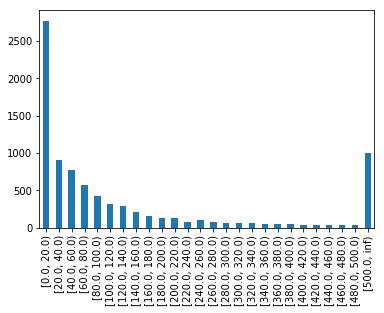

In [9]:
step = 20
lmax = 500
bin_range = np.arange(0, lmax + step, step).tolist()
bin_range.append(float('inf'))
out, bins  = pd.cut(RandHIE2.cost, bins = bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar()

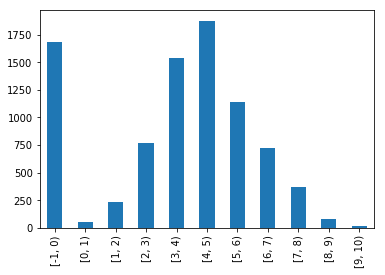

In [9]:
step = 1
bin_range = np.arange(-1, 11, step)
out, bins  = pd.cut(np.log(RandHIE2.cost + 0.5), bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar()

In [10]:
RandHIE2.cost = np.log(RandHIE2.cost + 0.5)
col_use.append('cost')
RandHIE2.cost_prev = np.log(RandHIE2.cost_prev + 0.5)
col_use.append('cost_prev')

We now procede to work with columns that need logarithm applied:

In [11]:
lcolumns = ['xage', 'disea', 'mhi', 'xghindx', 'educdec']

for c in lcolumns:
    RandHIE2['l' + c] = np.log(RandHIE2[c] + 0.5)
    col_use.append('l' + c)

We transform variables that should be dummyes but have some rare values 

In [12]:
RandHIE2.physlm = np.ceil(RandHIE2.physlm)
RandHIE2.black = np.ceil(RandHIE2.black)

We join the variables that should not be touched:

In [13]:
col_leave = ['year', 'logc', 'lpi', 'fmde', 'linc', 'lfam', 'physlm', 'idp', 'female', 'black', 'hlthg', 'hlthf', 'hlthp']
col_use += col_leave

In [14]:
RandHIE2 = RandHIE2[col_use]
RandHIE2.head(3)

,cost,cost_prev,lxage,ldisea,lmhi,lxghindx,leducdec,year,logc,lpi,fmde,linc,lfam,physlm,idp,female,black,hlthg,hlthf,hlthp
1,4.136373,2.191779,3.792732,2.655485,4.559126,4.185218,2.525729,2,0.0,6.907755,0.0,9.528776,1.386294,0.0,1,0,1.0,1,0,0
2,-0.693147,4.136373,3.815016,2.655485,4.559126,4.185218,2.525729,3,0.0,6.907755,0.0,9.528776,1.386294,0.0,1,0,1.0,1,0,0
3,-0.693147,-0.693147,3.836814,2.655485,4.559126,4.185218,2.525729,4,0.0,6.907755,0.0,9.528776,1.386294,0.0,1,0,1.0,1,0,0


### Create Train, Validation and Test Data

In [15]:
RandHIE2.year.value_counts()

3    3238
2    3205
5    1022
4    1004
Name: year, dtype: int64

In [16]:
Rand_train = RandHIE2[RandHIE2.year < 4].copy()
Rand_valid = RandHIE2[RandHIE2.year == 4].copy()
Rand_test = RandHIE2[RandHIE2.year == 5].copy()
del RandHIE2

### Write 

In [17]:
Rand_train = Rand_train.reset_index(drop=True)
Rand_valid = Rand_valid.reset_index(drop=True)
Rand_test = Rand_test.reset_index(drop=True)

In [19]:
Rand_train.to_csv("dep\\Rand_train.csv", index=False)
Rand_valid.to_csv("dep\\Rand_valid.csv", index=False)
Rand_test.to_csv("dep\\Rand_test.csv", index=False)